# **Identificación de Hubs**

Con base en los puntajes de centralidad obtenidos por CytoHubba vamos a ponderar los nodos por un promedio normalizado de todas sus metricas.

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# 1. Cargar el archivo CSV
# Lee el archivo 'hubs.csv' y lo guarda en un DataFrame de pandas
archivo = 'network_tf_macs_ha_cytohubba.csv'  
df = pd.read_csv(archivo)

# 2. Calcular Z-scores para todas las métricas de centralidad
# Define las métricas a evaluar y calcula su Z-score ((valor - media) / desviación estándar)
metricas = ['MCC','DMNC','MNC','Degree','EPC','BottleNeck','EcCentricity',
            'Closeness','Radiality','Betweenness','Stress','ClusteringCoefficient']
for metrica in metricas:
    df[f'z_{metrica}'] = (df[metrica] - df[metrica].mean()) / df[metrica].std()

# 3. Calcular un puntaje combinado (promedio de todos los Z-scores)
# Calcula el promedio general de los Z-scores de todas las métricas y lo añade como una nueva columna
df['Score_promedio'] = df[[f'z_{m}' for m in metricas]].mean(axis=1)

# 4. Ordenar y guardar resultados
# Ordena el DataFrame por el puntaje promedio en orden descendente y guarda el archivo como CSV
resultado = df.sort_values(by='Score_promedio', ascending=False)
resultado.to_csv('hubs_tf_macs_ha_scores.csv', index=False)

# Mensaje de confirmación
print("Matriz de importancia generada y guardada como 'hubs_$$$_scores.csv'")


Matriz de importancia generada y guardada como 'hubs_$$$_scores.csv'


In [19]:
# Mostrar los 10 hubs más importantes
top_hubs = resultado.head(10)
print(top_hubs[['node_name', 'Score_promedio']])


       node_name  Score_promedio
HDAC1  1937691.0        1.188769
MYC    1911174.0        1.005831
CREB1  1910292.0        0.990508
SP1     414010.0        0.937958
HIF1A  1844641.0        0.862317
RELA   1191048.0        0.841363
JUN    1942776.0        0.825553
STAT3  1927562.0        0.747688
FOS    1915344.0        0.690413
NFKB1  1492056.0        0.673608


In [20]:
# Selección de hubs en el percentil 95 (top 5%)
percentil_95 = resultado['Score_promedio'].quantile(0.80)
hubs_destacados = resultado[resultado['Score_promedio'] >= percentil_95]
print(hubs_destacados)

       node_name      MCC  DMNC   MNC  Degree  EPC  BottleNeck  EcCentricity  \
HDAC1  1937691.0  0.71027  19.0  20.0  12.361  2.0         0.5          24.0   
MYC    1911174.0  0.67007  19.0  19.0  12.330  3.0         0.5          23.5   
CREB1  1910292.0  0.67581  18.0  18.0  11.998  3.0         0.5          23.0   
SP1     414010.0  0.60089  15.0  15.0  11.325  3.0         0.5          21.5   
HIF1A  1844641.0  0.84125  15.0  16.0  12.012  2.0         0.5          22.0   
RELA   1191048.0  0.74486  16.0  16.0  11.679  4.0         0.5          22.0   

       Closeness  Radiality  ...  z_Degree     z_EPC  z_BottleNeck  \
HDAC1    2.85714  103.93874  ...  0.983052  0.541734      1.256956   
MYC      2.82143   48.21636  ...  0.974368  1.750217      1.256956   
CREB1    2.78571   53.56732  ...  0.881371  1.750217      1.256956   
SP1      2.67857   82.93155  ...  0.692855  1.750217      1.256956   
HIF1A    2.71429   61.37683  ...  0.885292  0.541734      1.256956   
RELA     2.71429   

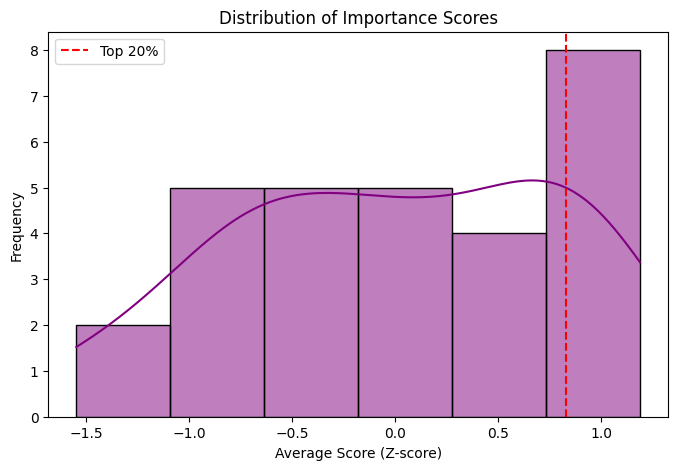

In [21]:

plt.figure(figsize=(8,5))
sns.histplot(resultado['Score_promedio'], kde=True, color='purple')
plt.axvline(percentil_95, color='red', linestyle='--', label='Top 20%')
plt.xlabel('Average Score (Z-score)')
plt.ylabel('Frequency')
plt.title('Distribution of Importance Scores')
plt.legend()
plt.show()


In [23]:
# Nodos importantes 5%
print(hubs_destacados[['node_name', 'Score_promedio']])

       node_name  Score_promedio
HDAC1  1937691.0        1.188769
MYC    1911174.0        1.005831
CREB1  1910292.0        0.990508
SP1     414010.0        0.937958
HIF1A  1844641.0        0.862317
RELA   1191048.0        0.841363
